In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

**Цель**: в двух AB-тестах определить, изменился ли средний чек 

# 1

In [2]:
df = pd.read_csv("test_1.csv")

In [3]:
test = df[df.group == "test"].target
control = df[df.group == "control"].target

In [4]:
control.mean(), test.mean()

(51.067378748698374, 49.95894395407758)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'test')

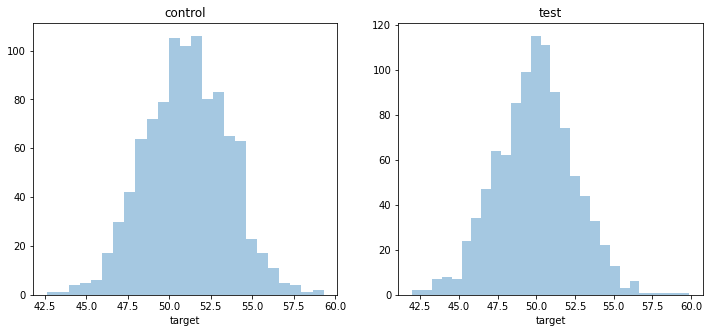

In [10]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(control, hist = True, kde = False,ax = ax)
ax.set_title('control')

ax=f.add_subplot(122)
sns.distplot(test, hist = True, kde = False,ax=ax)
ax.set_title('test')

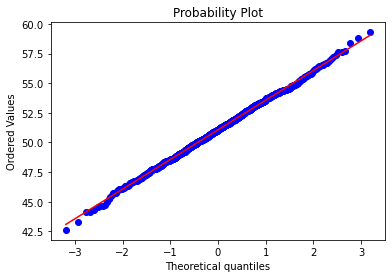

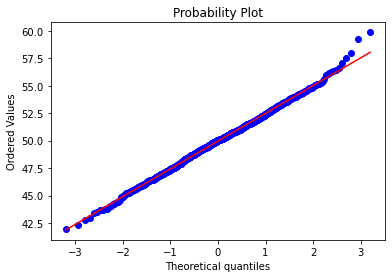

In [6]:
stats.probplot(control, dist="norm", plot=plt)
plt.show()

stats.probplot(test, dist="norm", plot=plt)
plt.show()

**Промежуточный вывод**:

Выборки подчиняются нормальному закону.

Выборки независимы.
Следовательно, можем использовать t-критерий Стьюдента для двух независимых выборок.

H0: Средние равны \
H1: Средние различны

In [7]:
alpha = 0.05

In [8]:
t_stat, p_value = stats.ttest_ind(control,test, alternative='two-sided')
t_stat, p_value

(9.878332719470977, 1.6802013491386015e-22)

In [9]:
p_value < alpha

True

Отклоняем H0.

**Вывод**:
Есть статзначимые различия.

# 2

In [10]:
df = pd.read_csv("test_2.csv")

In [11]:
test = df[df.group == "test"].avg_sum
control = df[df.group == "control"].avg_sum

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'test')

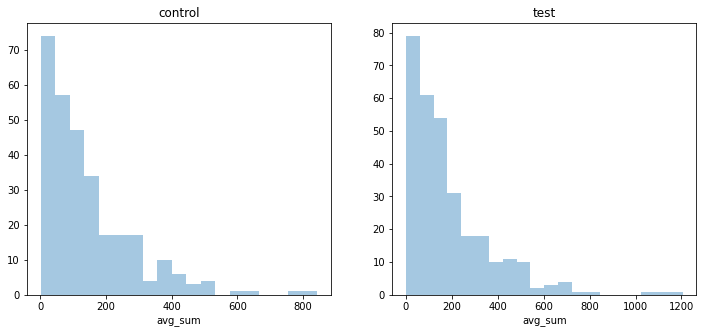

In [12]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(control, hist = True, kde = False,ax = ax)
ax.set_title('control')

ax=f.add_subplot(122)
sns.distplot(test, hist = True, kde = False,ax=ax)
ax.set_title('test')

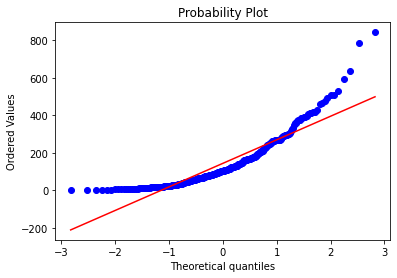

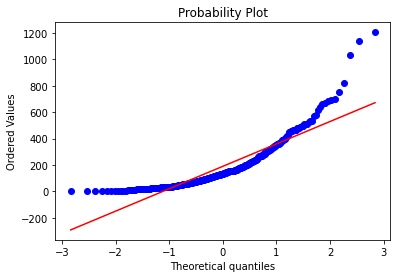

In [13]:
stats.probplot(control, dist="norm", plot=plt)
plt.show()

stats.probplot(test, dist="norm", plot=plt)
plt.show()

H0: Сумма чека не изменилась \
H1: Сумма чека увеличилась

**Промежуточный вывод**:

Выборки независимы. Не подчиняются нормальному закону. Поэтому, применяем критерий Манна-Уитни.

In [14]:
mw_stat, p_value = stats.mannwhitneyu(test,control, alternative = 'greater')
# H1 о том, что сумма чека увеличилась, поэтому 'greater'
mw_stat, p_value

(50943.0, 0.0024922812779452318)

In [15]:
p_value < alpha

True

Отклоняем H0. Различия статзначимы.

**Вывод**:
Сумма чека увеличилась